In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers
from keras.callbacks import EarlyStopping

import time
from datetime import datetime

import pandas as pd

In [2]:
def load_mnist_dataset(train_size=10000, flatten=True):
    """
    Load the MNIST data set consisting of handwritten single digit images 0-9
    formatted as 28 x 28 pixels with one channel (black and white)
    60000 images are for training
    10000 images are for testing
    This function reshapes the images as flattened 784 byte arrays, if needed
    The image bytes are normalized as float in [0,1]
    Y_train and Y_test are one-hot encoded for the 10 digit classes
    returns X_train, X_test, Y_train, Y_test
    """
    DIGIT_CLASSES = 10
    mnist = keras.datasets.mnist
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    #
    if flatten:
        #X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
        RESHAPED = 784
        X_train = X_train.reshape(60000, RESHAPED)
        X_test = X_test.reshape(10000, RESHAPED)
    else:
        # Retain 2D image shape for CNN
        X_train = X_train.reshape((60000, 28, 28, 1))
        X_test = X_test.reshape((10000, 28, 28, 1))

            
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    #normalize in [0,1]
    X_train /= 255
    X_test /= 255

    #one-hot
    Y_train = tf.keras.utils.to_categorical(Y_train, DIGIT_CLASSES)
    Y_test = tf.keras.utils.to_categorical(Y_test, DIGIT_CLASSES)
    ## Split off a smaller training sample of specified size and use
    ## the remainder of the training data as a validation set
    X_valid = X_train[train_size:]
    Y_valid = Y_train[train_size:]
    X_train = X_train[:train_size]
    Y_train = Y_train[:train_size]
    print(X_train.shape[0], 'train samples')
    print(X_valid.shape[0], 'validation samples')
    print(X_test.shape[0], 'test samples')
    
    return X_train, X_valid, X_test, Y_train, Y_valid, Y_test

In [3]:
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = load_mnist_dataset(train_size=20000, flatten=False)

20000 train samples
40000 validation samples
10000 test samples


In [4]:
def create_CNN_Model1():
    DIGIT_CLASSES = 10
    IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
    model = models.Sequential()
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(20, (5, 5), activation='relu',
        input_shape=INPUT_SHAPE))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # Flatten => RELU layers
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation='relu'))
    # a softmax classifier
    model.add(layers.Dense(DIGIT_CLASSES, activation="softmax"))
    return model
  
model1 = create_CNN_Model1()
model1.summary()
model1 = create_CNN_Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 500)               4

In [5]:
def create_CNN_Model2():
    DIGIT_CLASSES = 10
    IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
    model = models.Sequential()
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(40, (3, 3), activation='relu', padding='same',
        input_shape=INPUT_SHAPE))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(50, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # Flatten => RELU layers
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation='relu'))
    # a softmax classifier
    model.add(layers.Dense(DIGIT_CLASSES, activation="softmax"))
    return model

model2 = create_CNN_Model2()
model2.summary()
model2 = create_CNN_Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 40)        400       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 50)        18050     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2450)              0         
                                                                 
 dense_2 (Dense)             (None, 500)              

In [6]:
def create_CNN_Model3():
    DIGIT_CLASSES = 10
    IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
    model = models.Sequential()
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(40, (3, 3), activation='relu', padding='same',
        input_shape=INPUT_SHAPE))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(50, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # CONV => RELU
    model.add(layers.Convolution2D(50, (3, 3), activation='relu', padding='valid'))
    # Flatten => RELU layers
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation='relu'))
    # a softmax classifier
    model.add(layers.Dense(DIGIT_CLASSES, activation="softmax"))
    return model

model3 = create_CNN_Model3()
model3.summary()
model3 = create_CNN_Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 40)        400       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 50)        18050     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 5, 50)          22550     
                                                                 
 flatten_2 (Flatten)         (None, 1250)             

In [7]:
def create_CNN_Model4():
    DIGIT_CLASSES = 10
    IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
    model = models.Sequential()
    # CONV => RELU => CONV => RELU => POOL
    model.add(layers.Convolution2D(20, (3,3), activation='relu',
        input_shape=INPUT_SHAPE))
    model.add(layers.Convolution2D(50, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # CONV => RELU => CONV => RELU => POOL
    model.add(layers.Convolution2D(50, (3,3), activation='relu'))
    model.add(layers.Convolution2D(50, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # Flatten => RELU layers
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation='relu'))
    # a softmax classifier
    model.add(layers.Dense(DIGIT_CLASSES, activation="softmax"))
    return model
  
model4 = create_CNN_Model4()
model4.summary()
model4 = create_CNN_Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 20)        200       
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 50)        9050      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 50)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 50)        22550     
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 50)          22550     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                  

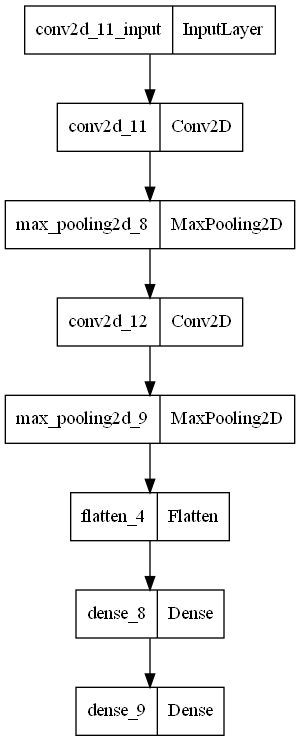

In [8]:
from keras.utils import plot_model
plot_model(create_CNN_Model1())

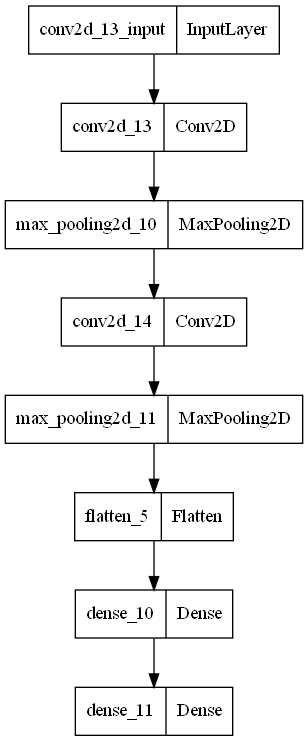

In [9]:
plot_model(create_CNN_Model2())

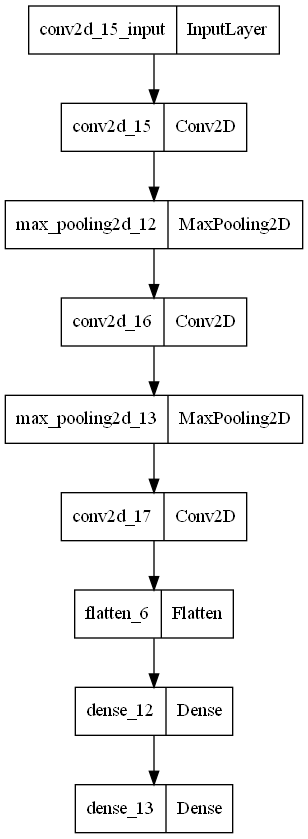

In [10]:
plot_model(create_CNN_Model3())

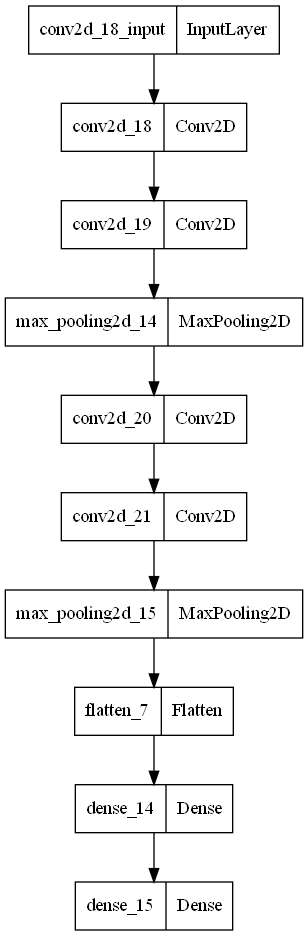

In [11]:
plot_model(create_CNN_Model4())

In [8]:
def run_CNN_Model(model_name=None, model_fn=None, train_size=10000, verbose=0):
    OPTIMIZER = tf.keras.optimizers.Adam()
    BATCH_SIZE = 128
    EPOCHS = 200
    X_train, X_valid, X_test, Y_train, Y_valid, Y_test = load_mnist_dataset(train_size=train_size, flatten=False)
    
    ## invoke the passed in model creation function
    model = model_fn()
    
    model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
    metrics=["accuracy"])


    early_stopping = EarlyStopping(monitor='val_loss',verbose=1,patience=3,min_delta=0.00001)

    callbacks = [
        early_stopping,
    ]
    start_time = time.time()
    # fit 
    history = model.fit(X_train, Y_train,
                        batch_size=BATCH_SIZE, epochs=EPOCHS,
                        verbose=verbose, validation_data=(X_valid,Y_valid),
                        callbacks=callbacks)
    elapsed_time = time.time() - start_time

    test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=1)
    print(f'training elapsed_time = {elapsed_time:10.1f}')
    print(f'{test_loss=}')
    print(f'{test_accuracy=}')
    return [model_name, train_size, elapsed_time, test_accuracy]


In [9]:
model_set = [('model1',model1),
             ('model2',model2),
             ('model3',model3),
             ('model4',model4),
            ]

In [10]:
def run_model_set(model_set, repeat=1):
    now = datetime.now()
    result_name = now.strftime("data/CNN_DATA_%Y-%m-%d_%H_%M.csv")
    results = []
    for i in range(repeat):
        for model_name, model in model_set:
            result = run_CNN_Model(model_name=model_name, model_fn=model, train_size=50000)
            results.append(result)
        df = pd.DataFrame(results)
        df.columns=['model_name','train_size','training_time','test_accuracy']
        display(df)
        print(f'Saving results to file {result_name}')
        df.to_csv(result_name,index=False)
    return results

results = run_model_set(model_set, repeat=20)


# df = pd.DataFrame(results)
# df.columns=['model_name','train_size','training_time','test_accuracy']
# display(df)
# now = datetime.now()
# result_name = now.strftime("data/CNN_DATA_%Y-%m-%d_%H:%M.csv")
# print(f'Saving results to file {result_name}')

# df.to_csv(result_name,index=False)


50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0239 - accuracy: 0.9918
training elapsed_time =       24.8
test_loss=0.023884056136012077
test_accuracy=0.9918000102043152
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0276 - accuracy: 0.9918
training elapsed_time =       33.2
test_loss=0.027558214962482452
test_accuracy=0.9918000102043152
50000 train samples
10000 validation samples
10000 test samples
Epoch 11: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9923
training elapsed_time =       54.0
test_loss=0.031556855887174606
test_accuracy=0.9922999739646912
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0268 - accuracy: 0

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0290 - accuracy: 0.9919
training elapsed_time =       27.8
test_loss=0.02895505353808403
test_accuracy=0.9919000267982483
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9901
training elapsed_time =       32.6
test_loss=0.030648477375507355
test_accuracy=0.9901000261306763
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0334 - accuracy: 0.9914
training elapsed_time =       48.6
test_loss=0.03338882699608803
test_accuracy=0.9914000034332275
50000 train samples
10000 validation samples
10000 test samples
Epoch 6: early stopping
313/313 [==================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0290 - accuracy: 0.9913
training elapsed_time =       31.3
test_loss=0.02898034080862999
test_accuracy=0.9912999868392944
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0312 - accuracy: 0.9902
training elapsed_time =       42.2
test_loss=0.031195586547255516
test_accuracy=0.9901999831199646
50000 train samples
10000 validation samples
10000 test samples
Epoch 6: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0319 - accuracy: 0.9908
training elapsed_time =       29.3
test_loss=0.03191357105970383
test_accuracy=0.9908000230789185
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0320 - accuracy: 0.9903
training elapsed_time =       28.1
test_loss=0.032041892409324646
test_accuracy=0.9902999997138977
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0297 - accuracy: 0.9902
training elapsed_time =       32.9
test_loss=0.02971263974905014
test_accuracy=0.9901999831199646
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9916
training elapsed_time =       39.3
test_loss=0.032531194388866425
test_accuracy=0.991599977016449
50000 train samples
10000 validation samples
10000 test samples
Epoch 11: early stopping
313/313 [==================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.9906
training elapsed_time =       28.0
test_loss=0.02925865165889263
test_accuracy=0.9905999898910522
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0355 - accuracy: 0.9900
training elapsed_time =       37.2
test_loss=0.03553980588912964
test_accuracy=0.9900000095367432
50000 train samples
10000 validation samples
10000 test samples
Epoch 14: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0389 - accuracy: 0.9913
training elapsed_time =       67.5
test_loss=0.03889035806059837
test_accuracy=0.9912999868392944
50000 train samples
10000 validation samples
10000 test samples
Epoch 6: early stopping
313/313 [===================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0287 - accuracy: 0.9910
training elapsed_time =       27.7
test_loss=0.02873159572482109
test_accuracy=0.9909999966621399
50000 train samples
10000 validation samples
10000 test samples
Epoch 6: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0337 - accuracy: 0.9889
training elapsed_time =       28.1
test_loss=0.033657193183898926
test_accuracy=0.9889000058174133
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0280 - accuracy: 0.9921
training elapsed_time =       34.8
test_loss=0.027963830158114433
test_accuracy=0.9921000003814697
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 12: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0433 - accuracy: 0.9892
training elapsed_time =       37.2
test_loss=0.043336980044841766
test_accuracy=0.9891999959945679
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0292 - accuracy: 0.9910
training elapsed_time =       32.8
test_loss=0.029241198673844337
test_accuracy=0.9909999966621399
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0358 - accuracy: 0.9892
training elapsed_time =       34.3
test_loss=0.03580426424741745
test_accuracy=0.9891999959945679
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [=================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0261 - accuracy: 0.9923
training elapsed_time =       28.2
test_loss=0.026068270206451416
test_accuracy=0.9922999739646912
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0290 - accuracy: 0.9904
training elapsed_time =       41.8
test_loss=0.0290452241897583
test_accuracy=0.9904000163078308
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0319 - accuracy: 0.9910
training elapsed_time =       34.0
test_loss=0.031902894377708435
test_accuracy=0.9909999966621399
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [===================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0239 - accuracy: 0.9928
training elapsed_time =       25.2
test_loss=0.023932909592986107
test_accuracy=0.9927999973297119
50000 train samples
10000 validation samples
10000 test samples
Epoch 12: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0276 - accuracy: 0.9928
training elapsed_time =       55.9
test_loss=0.027571823447942734
test_accuracy=0.9927999973297119
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0409 - accuracy: 0.9883
training elapsed_time =       44.1
test_loss=0.04087669774889946
test_accuracy=0.9883000254631042
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [=================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.9910
training elapsed_time =       28.0
test_loss=0.029164394363760948
test_accuracy=0.9909999966621399
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0309 - accuracy: 0.9911
training elapsed_time =       46.9
test_loss=0.030869314447045326
test_accuracy=0.991100013256073
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0354 - accuracy: 0.9900
training elapsed_time =       39.1
test_loss=0.035355836153030396
test_accuracy=0.9900000095367432
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [=================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0355 - accuracy: 0.9898
training elapsed_time =       27.9
test_loss=0.03546786680817604
test_accuracy=0.989799976348877
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0370 - accuracy: 0.9898
training elapsed_time =       37.7
test_loss=0.03703222796320915
test_accuracy=0.989799976348877
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0328 - accuracy: 0.9908
training elapsed_time =       48.7
test_loss=0.03277423232793808
test_accuracy=0.9908000230789185
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [=====================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0305 - accuracy: 0.9912
training elapsed_time =       31.0
test_loss=0.030459871515631676
test_accuracy=0.9911999702453613
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0320 - accuracy: 0.9906
training elapsed_time =       46.6
test_loss=0.03204486519098282
test_accuracy=0.9905999898910522
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9908
training elapsed_time =       39.2
test_loss=0.03250017762184143
test_accuracy=0.9908000230789185
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9904
training elapsed_time =       31.2
test_loss=0.036102741956710815
test_accuracy=0.9904000163078308
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0280 - accuracy: 0.9912
training elapsed_time =       37.2
test_loss=0.02800043113529682
test_accuracy=0.9911999702453613
50000 train samples
10000 validation samples
10000 test samples
Epoch 13: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0303 - accuracy: 0.9917
training elapsed_time =       62.4
test_loss=0.03032076358795166
test_accuracy=0.9916999936103821
50000 train samples
10000 validation samples
10000 test samples
Epoch 11: early stopping
313/313 [================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0277 - accuracy: 0.9929
training elapsed_time =       25.0
test_loss=0.02772795781493187
test_accuracy=0.992900013923645
50000 train samples
10000 validation samples
10000 test samples
Epoch 14: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0372 - accuracy: 0.9907
training elapsed_time =       64.9
test_loss=0.037217337638139725
test_accuracy=0.9907000064849854
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0470 - accuracy: 0.9880
training elapsed_time =       48.8
test_loss=0.04703900218009949
test_accuracy=0.9879999756813049
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [=================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 11: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0327 - accuracy: 0.9911
training elapsed_time =       34.3
test_loss=0.0326714850962162
test_accuracy=0.991100013256073
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0326 - accuracy: 0.9902
training elapsed_time =       32.7
test_loss=0.0325501374900341
test_accuracy=0.9901999831199646
50000 train samples
10000 validation samples
10000 test samples
Epoch 11: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0335 - accuracy: 0.9913
training elapsed_time =       53.6
test_loss=0.03352870047092438
test_accuracy=0.9912999868392944
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [====================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
5,model2,50000,32.598788,0.9901
6,model3,50000,48.582728,0.9914
7,model4,50000,39.016614,0.9919
8,model1,50000,31.258377,0.9913
9,model2,50000,42.153055,0.9902


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9917
training elapsed_time =       25.7
test_loss=0.03132864832878113
test_accuracy=0.9916999936103821
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9916
training elapsed_time =       42.4
test_loss=0.03401264548301697
test_accuracy=0.991599977016449
50000 train samples
10000 validation samples
10000 test samples
Epoch 11: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0320 - accuracy: 0.9915
training elapsed_time =       53.2
test_loss=0.03204365074634552
test_accuracy=0.9915000200271606
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [====================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
...,...,...,...,...
59,model4,50000,64.824536,0.9907
60,model1,50000,25.664881,0.9917
61,model2,50000,42.362130,0.9916
62,model3,50000,53.172393,0.9915


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0335 - accuracy: 0.9894
training elapsed_time =       21.8
test_loss=0.0334889218211174
test_accuracy=0.9894000291824341
50000 train samples
10000 validation samples
10000 test samples
Epoch 6: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0349 - accuracy: 0.9898
training elapsed_time =       28.4
test_loss=0.034923769533634186
test_accuracy=0.989799976348877
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9911
training elapsed_time =       38.8
test_loss=0.03159010410308838
test_accuracy=0.991100013256073
50000 train samples
10000 validation samples
10000 test samples
Epoch 11: early stopping
313/313 [=====================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
...,...,...,...,...
63,model4,50000,45.652761,0.9881
64,model1,50000,21.823274,0.9894
65,model2,50000,28.359215,0.9898
66,model3,50000,38.793433,0.9911


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 10: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0355 - accuracy: 0.9888
training elapsed_time =       31.2
test_loss=0.035478174686431885
test_accuracy=0.9887999892234802
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0332 - accuracy: 0.9901
training elapsed_time =       32.8
test_loss=0.033218175172805786
test_accuracy=0.9901000261306763
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0324 - accuracy: 0.9896
training elapsed_time =       44.1
test_loss=0.03239845111966133
test_accuracy=0.9896000027656555
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [=================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
...,...,...,...,...
67,model4,50000,70.570367,0.9922
68,model1,50000,31.219632,0.9888
69,model2,50000,32.802011,0.9901
70,model3,50000,44.056958,0.9896


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0334 - accuracy: 0.9912
training elapsed_time =       25.0
test_loss=0.03335803374648094
test_accuracy=0.9911999702453613
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0343 - accuracy: 0.9895
training elapsed_time =       37.8
test_loss=0.03431759774684906
test_accuracy=0.9894999861717224
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0303 - accuracy: 0.9911
training elapsed_time =       39.3
test_loss=0.030330035835504532
test_accuracy=0.991100013256073
50000 train samples
10000 validation samples
10000 test samples
Epoch 7: early stopping
313/313 [====================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
...,...,...,...,...
71,model4,50000,45.706964,0.9908
72,model1,50000,24.994722,0.9912
73,model2,50000,37.835662,0.9895
74,model3,50000,39.284748,0.9911


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0273 - accuracy: 0.9923
training elapsed_time =       25.1
test_loss=0.027268532663583755
test_accuracy=0.9922999739646912
50000 train samples
10000 validation samples
10000 test samples
Epoch 6: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0328 - accuracy: 0.9898
training elapsed_time =       28.2
test_loss=0.03277626633644104
test_accuracy=0.989799976348877
50000 train samples
10000 validation samples
10000 test samples
Epoch 9: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.0400 - accuracy: 0.9876
training elapsed_time =       44.0
test_loss=0.03999929875135422
test_accuracy=0.9876000285148621
50000 train samples
10000 validation samples
10000 test samples
Epoch 8: early stopping
313/313 [====================

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
...,...,...,...,...
75,model4,50000,46.000529,0.9923
76,model1,50000,25.098118,0.9923
77,model2,50000,28.161291,0.9898
78,model3,50000,43.995201,0.9876


Saving results to file data/CNN_DATA_2022-09-29_07_57.csv


In [11]:
# df = pd.DataFrame(results)
# df.columns=['model_name','train_size','training_time','test_accuracy']
# display(df)
# now = datetime.now()
# result_name = now.strftime("data/CNN_DATA_%Y-%m-%d_%H_%M.csv")
# print(f'Saving results to file {result_name}')

# df.to_csv(result_name,index=False)


In [1]:
import pandas as pd
df1 = pd.read_csv('data/CNN_DATA_2022-09-28_21_18.csv')
df1

,model_name,train_size,training_time,test_accuracy
0,model1,50000,30.376704,0.9902
1,model2,50000,42.672199,0.9878
2,model3,50000,29.635418,0.9904
3,model4,50000,65.077671,0.9924
4,model1,50000,24.425643,0.9898
...,...,...,...,...
75,model4,50000,70.128883,0.9926
76,model1,50000,33.541008,0.9917
77,model2,50000,42.358860,0.9882
78,model3,50000,38.853625,0.9912


In [2]:
df2 = pd.read_csv('data/CNN_DATA_2022-09-28_22_30.csv')
df2

,model_name,train_size,training_time,test_accuracy
0,model1,50000,32.821341,0.9893
1,model2,50000,40.424300,0.9871
2,model3,50000,37.481486,0.9908
3,model4,50000,70.795446,0.9894
4,model1,50000,24.496231,0.9913
...,...,...,...,...
75,model4,50000,57.300262,0.9912
76,model1,50000,24.395688,0.9894
77,model2,50000,39.880556,0.9897
78,model3,50000,41.851288,0.9919


In [3]:
df3 = pd.read_csv('data/CNN_DATA_2022-09-29_07_57.csv')
df3

,model_name,train_size,training_time,test_accuracy
0,model1,50000,24.802918,0.9918
1,model2,50000,33.188201,0.9918
2,model3,50000,53.953144,0.9923
3,model4,50000,52.723604,0.9925
4,model1,50000,27.840068,0.9919
...,...,...,...,...
75,model4,50000,46.000529,0.9923
76,model1,50000,25.098118,0.9923
77,model2,50000,28.161291,0.9898
78,model3,50000,43.995201,0.9876


In [4]:
df = pd.concat([df1,df2,df3],ignore_index=True)
df

,model_name,train_size,training_time,test_accuracy
0,model1,50000,30.376704,0.9902
1,model2,50000,42.672199,0.9878
2,model3,50000,29.635418,0.9904
3,model4,50000,65.077671,0.9924
4,model1,50000,24.425643,0.9898
...,...,...,...,...
235,model4,50000,46.000529,0.9923
236,model1,50000,25.098118,0.9923
237,model2,50000,28.161291,0.9898
238,model3,50000,43.995201,0.9876


In [47]:
df.to_csv('data/CNN_COMPARE.csv', index=False)

In [48]:
## Each of the four models has been trained and evaluated with the test data set 60 times.
## The observations of training_time and test_accuracy have now been collected into a single
## data set. Below we confirm that we now have 60 observations for each of the 4 models.
import numpy as np
grouped = df.groupby(['model_name'])
grouped.count()

,train_size,training_time,test_accuracy
model_name,,,
model1,60,60,60
model2,60,60,60
model3,60,60,60
model4,60,60,60


In [17]:
## Next we want to collect the the average training time and test accuracy for each model
averages = grouped[['training_time','test_accuracy']].aggregate(np.mean)
averages.reset_index(inplace=True)
averages

,model_name,training_time,test_accuracy
0,model1,28.130841,0.991043
1,model2,38.404469,0.990360
2,model3,43.188787,0.990868
3,model4,54.827480,0.991292


In [18]:
## We also calculate the variance within the 60 observations for each model.
variance = grouped[['training_time','test_accuracy']].aggregate(np.var)
variance.reset_index(inplace=True)
variance

,model_name,training_time,test_accuracy
0,model1,22.069224,0.000001
1,model2,63.906649,0.000002
2,model3,84.361286,0.000002
3,model4,114.322385,0.000003


In [49]:
## We also calculate the standard deviation within the 60 observations for each model.
std_dev = grouped[['training_time','test_accuracy']].aggregate(np.std)
std_dev.reset_index(inplace=True)
std_dev

,model_name,training_time,test_accuracy
0,model1,4.697789,0.001133
1,model2,7.994163,0.001255
2,model3,9.184840,0.001347
3,model4,10.692165,0.001594


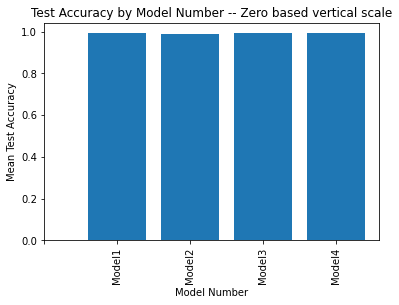

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

averages['model#'] = [1,2,3,4]

plt.bar(averages['model#'], averages['test_accuracy'])
plt.title("Test Accuracy by Model Number -- Zero based vertical scale")
plt.xlabel("Model Number")
plt.ylabel("Mean Test Accuracy")
bars_label = ['','Model1','Model2','Model3','Model4']
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()

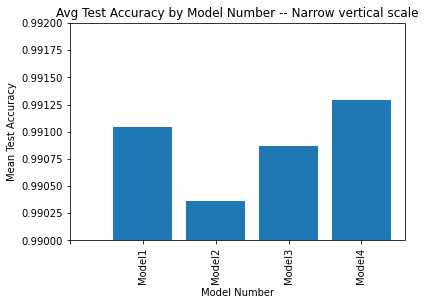

In [83]:
averages['model#'] = [1,2,3,4]

plt.bar(averages['model#'], averages['test_accuracy'])
plt.title("Avg Test Accuracy by Model Number -- Narrow vertical scale")
plt.xlabel("Model Number")
plt.ylabel("Mean Test Accuracy")
bars_label = ['','Model1','Model2','Model3','Model4']
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.ylim(0.990, 0.992)
plt.show()

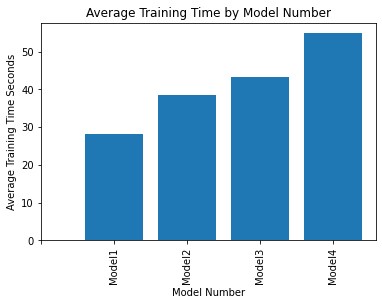

In [84]:
averages['model#'] = [1,2,3,4]

plt.bar(averages['model#'], averages['training_time'])
plt.title("Average Training Time by Model Number")
plt.xlabel("Model Number")
plt.ylabel("Average Training Time Seconds")
bars_label = ['','Model1','Model2','Model3','Model4']
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()

In [65]:
## Here we separate the observations of each model into 4 separate data frames, for easier pair-wise comparisons
def model_data(df,model_name):
    return df[df['model_name']==model_name][['training_time','test_accuracy']]

model1 = model_data(df, 'model1')
model2 = model_data(df, 'model2')
model3 = model_data(df, 'model3')
model4 = model_data(df, 'model4')

In [42]:
ttest_ind(model1, model2, axis=0, equal_var=False)

Ttest_indResult(statistic=array([-8.58244749,  3.13106173]), pvalue=array([1.70885067e-13, 2.20112241e-03]))

In [44]:
ttest_ind(model1, model3, axis=0, equal_var=False)

Ttest_indResult(statistic=array([-11.3059819 ,   0.77021683]), pvalue=array([7.99832972e-19, 4.42755820e-01]))

In [43]:
ttest_ind(model1, model4, axis=0, equal_var=False)

Ttest_indResult(statistic=array([-17.70673108,  -0.98388305]), pvalue=array([1.42624192e-29, 3.27403219e-01]))

In [64]:
from scipy.stats import ttest_ind

def run_ttest(df1, df2, column):
    """
    This method runs a 2-sided TTest for difference of the means of
    a selected column  from two corresponding data frames.
    """
    data1 = df1[column]
    mean1 = data1.mean()
    data2 = df2[column]
    mean2 = data2.mean()
    n = len(data1)
    pvalue = ttest_ind(data1, data2, equal_var=False).pvalue
    msg = f'Comparing {n} observations of mean {mean1:8.6f} to mean {mean2:8.6f}  {pvalue=:9.6f}'
    msg2 = None
    if pvalue <= 0.05:
        msg2 = ' appears to be significant.'
    else:
        msg2 = ' is NOT significant'
    display(msg+msg2)

run_ttest(model1, model2, 'test_accuracy')

run_ttest(model1, model4, 'test_accuracy')

'Comparing 60 observations of mean 0.991043 to mean 0.990360  pvalue= 0.002201 appears to be significant.'

'Comparing 60 observations of mean 0.991043 to mean 0.991292  pvalue= 0.327403 is NOT significant'

In [68]:
df['training_time'].sum()/3600

2.742526265647676